# Q1. What is the role of feature selection in anomaly detection?


Role of Feature Selection in Anomaly Detection

Feature selection plays a crucial role in enhancing the effectiveness and efficiency of anomaly detection models. By carefully selecting relevant features, we can:   

Improve accuracy: Focus on the most informative features that contribute to distinguishing normal and anomalous data points.
Reduce dimensionality: Simplify the problem and improve computational efficiency by eliminating irrelevant or redundant features.   
Enhance interpretability: Make it easier to understand the factors contributing to anomaly detection.
Handle noisy data: Filter out noisy features that might obscure underlying patterns.   
Key considerations for feature selection in anomaly detection:

Feature relevance: Identify features that strongly correlate with anomalous behavior.
Feature redundancy: Remove features that provide redundant information.
Computational efficiency: Select a subset of features to reduce processing time.
Domain knowledge: Incorporate expert knowledge to guide feature selection.
By carefully selecting the right features, anomaly detection models can achieve better performance and provide valuable insights into the underlying data

# Q2. What are some common evaluation metrics for anomaly detection algorithms and how are they computed?


Common Evaluation Metrics for Anomaly Detection

Evaluating anomaly detection models is crucial to understand their performance. Here are some common metrics:   

Confusion Matrix-Based Metrics
These metrics rely on a confusion matrix which categorizes predictions into four categories:

True Positive (TP): Correctly identified anomalies.   
True Negative (TN): Correctly identified normal instances.   
False Positive (FP): Normal instances incorrectly labeled as anomalies.
False Negative (FN): Anomalies incorrectly labeled as normal instances.
From these, we can calculate:

Precision: The proportion of positive predictions that were actually correct.
Precision = TP / (TP + FP)
Recall (Sensitivity): The proportion of actual positives that were correctly identified.
Recall = TP / (TP + FN)
F1-score: The harmonic mean of precision and recall.
F1-score = 2 * (Precision * Recall) / (Precision + Recall)
Accuracy: The overall proportion of correct predictions.
Accuracy = (TP + TN) / (TP + TN + FP + FN)
Anomaly Score-Based Metrics
These metrics are often used when the model outputs an anomaly score for each data point.

Area Under the Precision-Recall Curve (PR AUC): This metric is particularly useful when the dataset is imbalanced. It measures the trade-off between precision and recall across different threshold values.   
Area Under the Receiver Operating Characteristic Curve (ROC AUC): Measures the model's ability to distinguish between anomalies and normal instances across various threshold values.   
Other Metrics
False Positive Rate (FPR): The proportion of negative instances incorrectly labeled as positive.
FPR = FP / (FP + TN)
True Negative Rate (TNR): The proportion of negative instances correctly identified.
TNR = TN / (FP + TN)
Note: The choice of metric depends on the specific application and the relative importance of false positives and false negatives.

In [1]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix, average_precision_score
import numpy as np

# Example ground truth labels and predictions
y_true = np.array([0, 1, 0, 1, 0, 0, 1, 1])
y_pred = np.array([0, 1, 0, 0, 0, 1, 1, 1])

# Compute metrics
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)
avg_precision = average_precision_score(y_true, y_pred)

# Print metrics
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'ROC AUC: {roc_auc:.2f}')
print(f'Average Precision: {avg_precision:.2f}')


Precision: 0.75
Recall: 0.75
F1 Score: 0.75
Accuracy: 0.75
Confusion Matrix:
[[3 1]
 [1 3]]
ROC AUC: 0.75
Average Precision: 0.69




# Q3. What is DBSCAN and how does it work for clustering?


DBSCAN: Density-Based Spatial Clustering of Applications with Noise

DBSCAN is a clustering algorithm that groups data points based on their density. Unlike other clustering algorithms like K-Means, DBSCAN doesn't require specifying the number of clusters beforehand.   

How DBSCAN Works
Core Points: A data point is a core point if it has at least a minimum number of points (MinPts) within a specified radius (Eps).   
Border Points: A data point is a border point if it is within the neighborhood of a core point but does not have enough points within its own Eps-neighborhood to be a core point itself.   
Noise Points: Data points that are neither core nor border points are classified as noise.   
DBSCAN works by expanding clusters from core points. It starts with an arbitrary point and finds all its neighbors within Eps. If there are enough neighbors (MinPts), a cluster is formed. The algorithm recursively expands the cluster by including the neighbors of these neighbors. This process continues until no new points can be added to the cluster. The process is repeated for unvisited points until all points are assigned to a cluster or labeled as noise.   

Key Parameters
Eps: The radius of the neighborhood.
MinPts: The minimum number of points required to form a dense region.   
Advantages of DBSCAN
Does not require specifying the number of clusters.   
Can discover clusters of arbitrary shape.   
Able to identify outliers (noise).   
Disadvantages of DBSCAN
Sensitive to parameters Eps and MinPts.   
Performance can degrade on high-dimensional data.

Cluster labels: [ 0  0  0  1  1 -1]


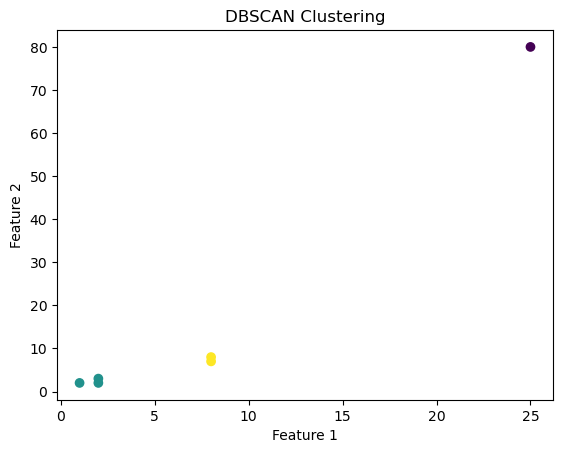

In [2]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

# Example dataset
X = np.array([
    [1, 2], [2, 2], [2, 3], [8, 7], [8, 8], [25, 80]
])

# Apply DBSCAN
dbscan = DBSCAN(eps=3, min_samples=2)
labels = dbscan.fit_predict(X)

# Print cluster labels
print(f'Cluster labels: {labels}')

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()



# Q4. How does the epsilon parameter affect the performance of DBSCAN in detecting anomalies?


Epsilon (Eps) and its Impact on DBSCAN Anomaly Detection


The epsilon (Eps) parameter in DBSCAN is crucial for determining the neighborhood size around a data point.

 It directly influences the performance of the algorithm in detecting anomalies.   

Impact of Epsilon on Anomaly Detection
Small Epsilon:

More sensitive to noise: Small values of Eps can lead to many points being classified as noise, as they might not have enough neighbors within the specified radius.
Overfitting: If the data is dense, a small Eps can result in too many clusters, making it difficult to identify anomalies.
Large Epsilon:

Less sensitive to noise: A larger Eps can group more points together, making it less likely to classify points as noise.
Underfitting: If the data has distinct clusters, a large Eps might merge them into a single cluster, hindering anomaly detection.
Finding the Optimal Epsilon
Choosing the right Eps value is essential for effective anomaly detection with DBSCAN. Some common techniques include:

Domain knowledge: Leverage insights from the problem domain to estimate an appropriate Eps value.
Heuristic methods: Employ techniques like knee point detection or density-based methods to find an optimal Eps.
Grid search: Experiment with different Eps values to find the best performance.

# Q5. What are the differences between the core, border, and noise points in DBSCAN, and how do they relate to anomaly detection?


Core, Border, and Noise Points in DBSCAN and Anomaly Detection

Core, Border, and Noise Points

DBSCAN categorizes data points into three types based on their density:

Core points: A data point is considered a core point if it has at least MinPts points (including itself) within a radius of Eps. These points are the heart of clusters.
Border points: These points are neighbors of core points but do not have enough points within their own Eps neighborhood to be core points. They lie on the edges of clusters.

Noise points: Points that are neither core nor border points are considered noise or outliers.   
Relation to Anomaly Detection
DBSCAN's classification system directly relates to anomaly detection:

Noise points as anomalies: Noise points are often considered strong candidates for anomalies as they do not belong to any dense cluster. They are isolated data points that significantly deviate from the normal data distribution.
Border points as potential anomalies: While not explicitly labeled as anomalies, border points can be potential outliers. They reside on the boundaries of clusters and might represent unusual data patterns. Further analysis or additional techniques might be necessary to definitively classify them as anomalies.
Core points: Typically, core points are considered part of the normal data distribution and are less likely to be anomalies.
Key points to remember:

Density-based approach: DBSCAN's strength lies in identifying anomalies based on density, making it suitable for detecting outliers in clusters of arbitrary shape.
Parameter sensitivity: The choice of Eps and MinPts significantly impacts the classification of points, and careful parameter tuning is essential for accurate anomaly detection.
Complementary techniques: Combining DBSCAN with other anomaly detection methods can improve overall performance.
By understanding the distinctions between core, border, and noise points, you can effectively leverage DBSCAN for identifying anomalies in your dataset.


# Q6. How does DBSCAN detect anomalies and what are the key parameters involved in the process?


DBSCAN for Anomaly Detection

DBSCAN detects anomalies by identifying points that do not belong to any dense cluster.

 It operates on the principle that normal data points tend to cluster together, while anomalies are outliers isolated from these clusters.   

How DBSCAN Detects Anomalies
Core point identification: Points with at least MinPts neighbors within a radius of Eps are considered core points.
Cluster formation: Clusters are formed by expanding regions around core points, including neighboring points that are within Eps distance.
Anomaly detection: Points that do not belong to any formed cluster are classified as noise or outliers. These points are considered anomalies.
Key Parameters
Eps (epsilon): Defines the radius of the neighborhood around a data point. It determines the density threshold for clustering.   
MinPts: Specifies the minimum number of points required to form a dense region.   
Anomaly detection using DBSCAN is effective for:

Identifying isolated data points.
Detecting anomalies in data with arbitrary shapes.
Handling datasets with varying densities.
Challenges:

Sensitivity to parameter values: Incorrect values of Eps and MinPts can lead to inaccurate results.
Computational complexity: DBSCAN can be computationally expensive for large datasets.   


# Q7. What is the make_circles package in scikit-learn used for?


he make_circles function in scikit-learn is used to generate a synthetic dataset of points that form concentric circles. This function is useful for creating data with a non-linear decision boundary, which can be used to test and visualize clustering and classification algorithms.

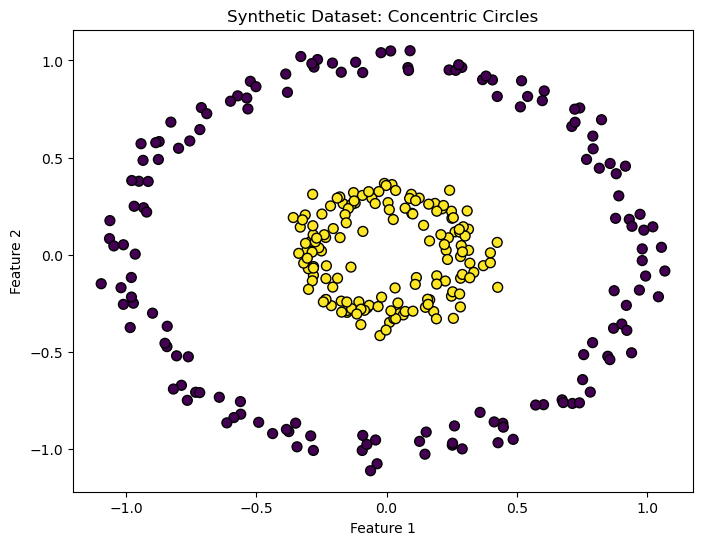

In [3]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

# Generate synthetic dataset
X, y = make_circles(n_samples=300, noise=0.05, factor=0.3, random_state=42)

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('Synthetic Dataset: Concentric Circles')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


# Q8. What are local outliers and global outliers, and how do they differ from each other?


Local Outliers vs. Global Outliers

Global Outliers

A global outlier is a data point that deviates significantly from the overall distribution of the dataset.

 It's a point that lies far away from the majority of the data points. These outliers are often easy to identify using statistical methods like z-scores or box plots.   

Local Outliers

A local outlier is a data point that deviates significantly from its neighboring points, even though it might not be considered an outlier when considering the entire dataset. In other words, it's an anomaly within a specific region of the data.   

Key Differences:

Scope: Global outliers are identified based on the entire dataset, while local outliers are identified based on a local neighborhood.   
Density: Local outliers often occur in regions with lower data density, while global outliers are typically isolated points.
Detection methods: Different techniques are required to identify each type. For example, statistical methods are often suitable for global outliers, while density-based methods like LOF (Local Outlier Factor) are better suited for local outliers.
Understanding the distinction between local and global outliers is crucial for accurate anomaly detection. Some datasets might contain both types of outliers, and different techniques might be necessary to identify them effectively.

# Q9. How can local outliers be detected using the Local Outlier Factor (LOF) algorithm?


The Local Outlier Factor (LOF) algorithm detects local outliers by measuring the local deviation of a data point's density compared to its neighbors. LOF is useful for identifying anomalies in datasets where outliers are not necessarily globally rare but might be locally unusual.

Here’s how LOF works:

Local Density: For each point, LOF calculates its local density based on its distance to its nearest neighbors. Points with lower local density compared to their neighbors are considered outliers.

LOF Score: The LOF score for a point is the ratio of its local density to the average local density of its neighbors. A higher LOF score indicates a higher likelihood of being an outlier.

Parameter n_neighbors: This parameter determines the number of neighbors used to compute the local density. Typical values are between 10 and 50.

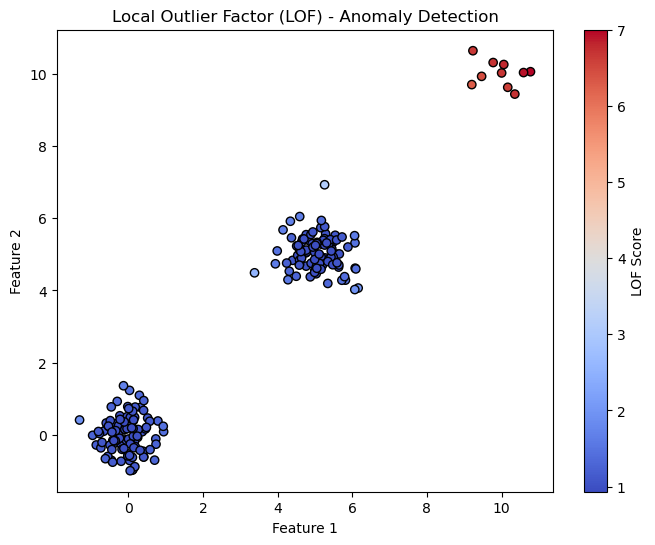

Number of outliers detected: 23


In [4]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np
import matplotlib.pyplot as plt

# Generate a synthetic dataset
np.random.seed(42)
X = np.concatenate([np.random.normal(0, 0.5, (100, 2)), 
                     np.random.normal(5, 0.5, (100, 2)), 
                     np.random.normal(10, 0.5, (10, 2))])

# Apply LOF
lof = LocalOutlierFactor(n_neighbors=20)
y_pred = lof.fit_predict(X)

# LOF anomaly score
y_scores = -lof.negative_outlier_factor_

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_scores, cmap='coolwarm', edgecolor='k')
plt.colorbar(label='LOF Score')
plt.title('Local Outlier Factor (LOF) - Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Print number of outliers
num_outliers = np.sum(y_pred == -1)
print(f'Number of outliers detected: {num_outliers}')



# Q10. How can global outliers be detected using the Isolation Forest algorithm?


The Isolation Forest algorithm is an effective method for detecting global outliers by isolating observations in a dataset. It works well for high-dimensional data and is particularly useful for identifying anomalies in large datasets. The algorithm's key idea is that outliers are easier to isolate compared to normal data points.

Isolation Forest algorithm works:

Isolation: The algorithm creates multiple random trees (isolation trees) by recursively partitioning the data. Each tree isolates a data point by randomly selecting a feature and splitting it randomly.

Path Length: The number of splits required to isolate a data point is called the path length. Outliers, being more isolated, typically require fewer splits to be isolated compared to normal points.

Anomaly Score: The anomaly score is based on the average path length across all trees. Points with shorter average path lengths are considered outliers.

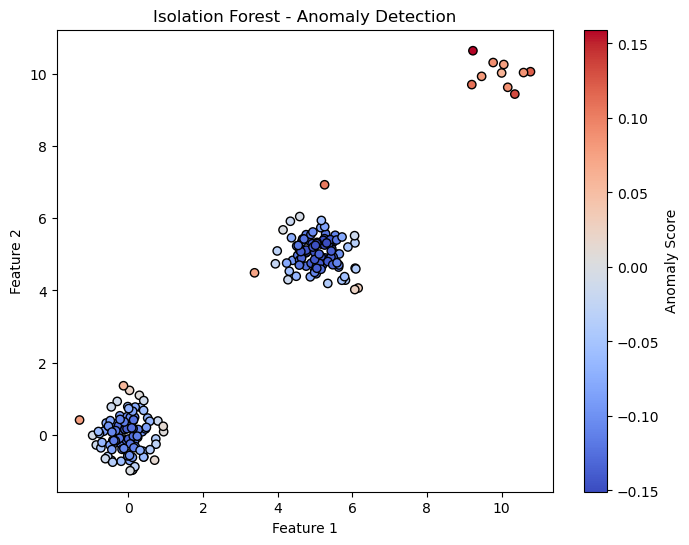

Number of outliers detected: 21


In [5]:
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt

# Generate a synthetic dataset
np.random.seed(42)
X = np.concatenate([np.random.normal(0, 0.5, (100, 2)), 
                     np.random.normal(5, 0.5, (100, 2)), 
                     np.random.normal(10, 0.5, (10, 2))])

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
y_pred = iso_forest.fit_predict(X)

# Anomaly score
y_scores = -iso_forest.decision_function(X)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_scores, cmap='coolwarm', edgecolor='k')
plt.colorbar(label='Anomaly Score')
plt.title('Isolation Forest - Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Print number of outliers
num_outliers = np.sum(y_pred == -1)
print(f'Number of outliers detected: {num_outliers}')


# Q11. What are some real-world applications where local outlier detection is more appropriate than global outlier detection, and vice versa?

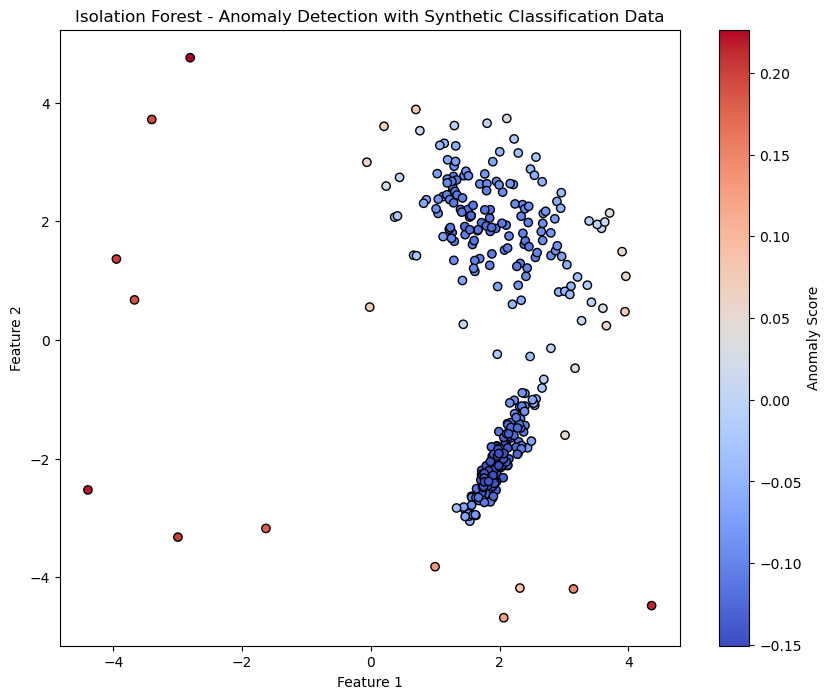

Number of outliers detected: 32


In [7]:
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate a synthetic dataset
np.random.seed(42)
X, _ = make_classification(n_samples=300, n_features=2, n_clusters_per_class=1, n_redundant=0, n_informative=2, flip_y=0, class_sep=2)

# Add some outliers
n_outliers = 20
outliers = np.random.uniform(low=-5, high=5, size=(n_outliers, 2))
X_with_outliers = np.vstack([X, outliers])

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
y_pred = iso_forest.fit_predict(X_with_outliers)

# Anomaly score
y_scores = -iso_forest.decision_function(X_with_outliers)

# Plot the results
plt.figure(figsize=(10, 8))
plt.scatter(X_with_outliers[:, 0], X_with_outliers[:, 1], c=y_scores, cmap='coolwarm', edgecolor='k')
plt.colorbar(label='Anomaly Score')
plt.title('Isolation Forest - Anomaly Detection with Synthetic Classification Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Print number of outliers detected
num_outliers = np.sum(y_pred == -1)
print(f'Number of outliers detected: {num_outliers}')

Local vs. Global Outlier Detection: Real-World Applications

Local Outlier Detection

Local outlier detection is particularly useful when the data exhibits clusters or subgroups with different characteristics. Anomalies in this context are points that deviate significantly from their local neighborhood, even if they seem normal when considering the entire dataset.

Examples:
    
Fraud detection: Detecting unusual spending patterns for a specific customer compared to their historical behavior.
Network intrusion detection: Identifying anomalous network traffic patterns for a particular host.
Sensor data analysis: Detecting abnormal sensor readings within a specific time window or location.

Global Outlier Detection

Global outlier detection is suitable when the overall distribution of the data is of primary interest, and anomalies are points that are significantly distant from the majority of the data.

Examples:
    
Credit card fraud: Detecting unusually large transactions compared to the overall spending behavior of all customers.
Manufacturing quality control: Identifying products with extreme measurements that deviate from the overall product specifications.
Climate change analysis: Detecting extreme weather events that are significantly different from historical patterns.

In summary:

Local outlier detection is more appropriate when the context of a data point is crucial and anomalies are defined relative to their neighbors.
Global outlier detection is more suitable when the overall distribution of the data is the primary focus and anomalies are defined as extreme values compared to the entire dataset.